In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [6]:
from sklearn.metrics import precision_recall_curve

In [2]:
data= pd.read_csv("data_final1.csv")
data

,Residence,Educational level,Sex_Household_head,Owned mobile phone,Wealth status,Distance to HF,Marital status,Husband education,Age_category,Media_exposure,Religion_recode,Age_houseohld_head_recoded,birth_category,birth_interval,timing_ANC_check,No_ of_children,ANC_visit,working_status,place_of_delivery
0,0,1,0,0,4,1,5,5,0,0,8,1,2,2,1,0,2,1,0
1,0,0,0,0,0,1,5,5,2,0,8,2,0,3,0,1,2,1,1
2,0,1,0,0,3,0,5,5,1,0,8,2,1,3,0,1,0,1,1
3,0,1,1,0,4,1,5,5,1,0,8,2,1,1,0,0,2,1,1
4,0,1,0,0,1,1,5,5,0,0,8,1,1,2,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,0,1,0,0,1,1,5,5,1,1,4,2,1,3,1,0,3,0,0
86005,0,1,0,0,3,0,5,5,2,0,7,2,3,3,1,1,3,0,0
86006,0,2,0,1,3,1,5,5,1,1,4,2,2,3,1,1,2,1,1
86007,0,1,1,1,1,1,5,5,0,1,6,1,1,3,0,0,3,1,1


In [8]:
data.dtypes

v025                          int64
v106                          int64
v151                          int64
v157                          int64
v158                          int64
v159                          int64
v169a                         int64
v171a                         int64
v190                          int64
v394                          int64
v467d                         int64
v501                          int64
v701                          int64
age_category                  int64
media_exposure                int64
religion_recode               int64
age_houseohld_head_recoded    int64
bord_category                 int64
birth_interval_coded          int64
timing_ANC_check_recoded      int64
new_num_children              int64
new_ANC_visit                 int64
working_status                int64
place_of_delivery             int64
dtype: object

In [9]:
# Print the column names in the DataFrame
print(data.columns)

Index(['v025', 'v106', 'v151', 'v157', 'v158', 'v159', 'v169a', 'v171a',
       'v190', 'v394', 'v467d', 'v501', 'v701', 'age_category',
       'media_exposure', 'religion_recode', 'age_houseohld_head_recoded',
       'bord_category', 'birth_interval_coded', 'timing_ANC_check_recoded',
       'new_num_children', 'new_ANC_visit', 'working_status',
       'place_of_delivery'],
      dtype='object')


In [10]:
# Assuming 'data' is your DataFrame with a column named 'column_name' of type int64
data['v025'] = data['v025'].astype(int)
data['v106'] = data['v106'].astype(int)
data['v151'] = data['v151'].astype(int)
data['v157'] = data['v157'].astype(int)
data['v158'] = data['v158'].astype(int)
data['v159'] = data['v159'].astype(int)
data['v169a'] = data['v169a'].astype(int)
data['v171a'] = data['v171a'].astype(int)
data['v190'] = data['v190'].astype(int)
data['v394'] = data['v394'].astype(int)
data['v467d'] = data['v467d'].astype(int)
data['v501'] = data['v501'].astype(int)
data['v701'] = data['v701'].astype(int)
data['age_category'] = data['age_category'].astype(int)
data['media_exposure'] = data['media_exposure'].astype(int)
data['religion_recode'] = data['religion_recode'].astype(int)
data['age_houseohld_head_recoded'] = data['age_houseohld_head_recoded'].astype(int)
data['bord_category'] = data['bord_category'].astype(int)
data['birth_interval_coded'] = data['birth_interval_coded'].astype(int)
data['timing_ANC_check_recoded'] = data['timing_ANC_check_recoded'].astype(int)
data['new_num_children'] = data['new_num_children'].astype(int)
data['place_of_delivery'] = data['place_of_delivery'].astype(int)
data['working_status'] = data['working_status'].astype(int)
data['new_ANC_visit'] = data['new_ANC_visit'].astype(int)

In [11]:
##Data Preprocessing/Feauture selection
X = data.drop('place_of_delivery',axis=1)
y = data.place_of_delivery
num_features_opt = 40   # the number of features that we need to choose as a result
num_features_max = 60   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [12]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()

X, y = smote_enn.fit_resample(data.loc[:, data.columns != 'place_of_delivery'], data['place_of_delivery'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (84434, 23)
Shape of y: (84434,)


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_train_valid_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Usage example
X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y, test_size=0.3, random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0], train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0], valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0], test_counts[1]))

[train] # class 0: 21211 | # class 1: 12562
[valid] # class 0: 15909 | # class 1: 9421
[test]  # class 0: 15910 | # class 1: 9421


In [19]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Healthcare delivery in East Africa")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
def plot_cm(y_test,y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    # labels, title and ticks
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["No", "Yes"]);
    ax.yaxis.set_ticklabels(["No", "Yes"]);
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [64]:
from sklearn.svm import SVC

# Create the SVC model with probability estimates enabled
svm_model = SVC(probability=True)

# Fit the model to your data
svm_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = svm_model.predict_proba(X_test)

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.1538    | 3.745e+05 | 9.507     |
| 2         | 0.1762    | 7.32e+05  | 5.987     |
| 3         | 0.864     | 1.56e+05  | 1.56      |
| 4         | 0.1538    | 5.808e+04 | 8.662     |
| 5         | 0.1752    | 6.011e+05 | 7.081     |
| 6         | 0.1538    | 2.058e+04 | 9.699     |
| 7         | 0.8732    | 8.324e+05 | 2.123     |
| 8         | 0.8631    | 1.818e+05 | 1.834     |
| 9         | 0.1778    | 3.042e+05 | 5.248     |
| 10        | 0.3269    | 4.319e+05 | 2.912     |
| 11        | 0.8627    | 9.037e+05 | 1.772     |
| 12        | 0.8803    | 9.037e+05 | 0.9843    |
| 13        | 0.2112    | 9.039e+05 | 4.115     |
| 14        | 0.1752    | 8.323e+05 | 7.258     |
| 15        | 0.9237    | 1.818e+05 | 0.4106    |
| 16        | 0.1538    | 8.326e+05 | 9.248     |
| 17        | 0.1776    | 1.561e+05 | 5.655     |
| 18        | 0.1752    | 1.817e+05 | 7.043     |


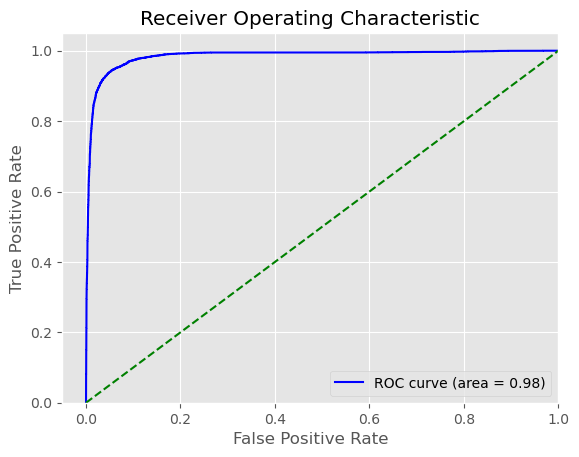

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def evaluate_model(C, gamma):
    # Create the SVM model with the specified hyperparameters
    svm_model = SVC(C=C, gamma=gamma)

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Predict the test set results
    y_pred = svm_model.predict(X_test)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'C': (1e-6, 1e+6), 'gamma': (1e-6, 1e+1)}

# Create the optimizer
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)

# Perform Bayesian optimization
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
C = best_params['C']
gamma = best_params['gamma']

# Create the final SVM model with the best hyperparameters
svm_model = SVC(C=C, gamma=gamma)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_model.predict(X_test)

# Calculate performance metrics
accuracy_score_svm = accuracy_score(y_test, y_pred)
prec_svm = precision_score(y_test, y_pred)
rec_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_svm = tp / (tp + fn)
spec_svm = tn / (tn + fp)
y_pred_prob = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_svm = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("Best Hyperparameters: C = {:.6f}, gamma = {:.6f}".format(C, gamma))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score_svm))
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.naive_bayes import GaussianNB

# Create the GaussianNB model
gnb_model = GaussianNB()

# Fit the model to your data
gnb_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = gnb_model.predict_proba(X_test)

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.7076    | 0.03745   |
| 2         | 0.7077    | 0.09507   |
| 3         | 0.708     | 0.0732    |
| 4         | 0.7081    | 0.05987   |
| 5         | 0.7072    | 0.0156    |
| 6         | 0.7072    | 0.0156    |
| 7         | 0.7071    | 0.005808  |
| 8         | 0.7076    | 0.08662   |
| 9         | 0.7081    | 0.06011   |
| 10        | 0.7078    | 0.07081   |
| 11        | 0.7079    | 0.0498    |
| 12        | 0.7078    | 0.07858   |
| 13        | 0.7074    | 0.0277    |
| 14        | 0.7081    | 0.05439   |
| 15        | 0.7078    | 0.1       |
| 16        | 0.7075    | 0.04436   |
| 17        | 0.708     | 0.06398   |
| 18        | 0.7079    | 0.0752    |
| 19        | 0.7081    | 0.05674   |
| 20        | 0.708     | 0.05228   |
| 21        | 0.7081    | 0.06225   |
| 22        | 0.7065    | 1e-09     |
| 23        | 0.7077    | 0.08243   |
| 24        | 0.7081    | 0.06184   |
| 25        

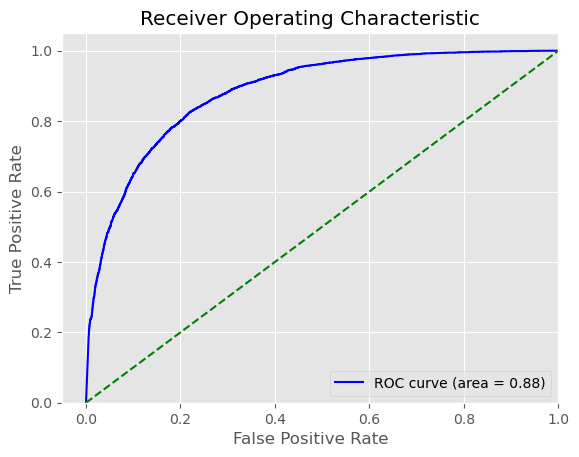

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Define the objective function for optimization
def evaluate_model(alpha):
# Create the GaussianNB model with the specified alpha
gnb_model = GaussianNB(var_smoothing=alpha)

stata
Copy
# Fit the model on the training data
gnb_model.fit(X_train, y_train)

# Predict the test set results
y_pred = gnb_model.predict(X_test)

# Calculate and return the F1 score
return f1_score(y_test, y_pred)
Define the parameter bounds for Bayesian optimization
pbounds = {'alpha': (1e-9, 1e-1)}

Create the optimizer
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)

Perform Bayesian optimization
optimizer.maximize(init_points=10, n_iter=20)

Get the best hyperparameters
best_params = optimizer.max['params']
alpha = best_params['alpha']

Create the final GaussianNB model with the best hyperparameters
gnb_model = GaussianNB(var_smoothing=alpha)

Fit the model on the training data
gnb_model.fit(X_train, y_train)

Predict the test set results
y_pred = gnb_model.predict(X_test)

Calculate performance metrics
accuracy_score_gnb = accuracy_score(y_test, y_pred)
prec_gnb = precision_score(y_test, y_pred)
rec_gnb = recall_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_gnb = tp / (tp + fn)
spec_gnb = tn / (tn + fp)
y_pred_prob = gnb_model.predict_proba(X_test)[:, 1] # Probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_gnb = roc_auc_score(y_test, y_pred_prob)

Print performance metrics
print("Best Hyperparameter (alpha): {:.6f}".format(alpha))
print("Accuracy score for GaussianNB: {:.2f}".format(accuracy_score_gnb))
print("Precision score for GaussianNB: {:.2f}".format(prec_gnb))
print("Recall score for GaussianNB: {:.2f}".format(rec_gnb))
print("F1 score for GaussianNB: {:.2f}".format(f1_gnb))
print("Sensitivity score for GaussianNB: {:.2f}".format(sens_gnb))
print("Specificity score for GaussianNB: {:.2f}".format(spec_gnb))
print("AUC score for GaussianNB: {:.2f}".format(auc_gnb))

Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model
logit_model = LogisticRegression()

# Fit the model to your data
logit_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = logit_model.predict_proba(X_test)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.7811    | 3.752     |
| 2         | 0.7811    | 9.508     |
| 3         | 0.7811    | 7.323     |
| 4         | 0.7811    | 5.991     |
| 5         | 0.7811    | 1.569     |
| 6         | 0.7811    | 1.568     |
| 7         | 0.7811    | 0.5903    |
| 8         | 0.7811    | 8.663     |
| 9         | 0.7811    | 6.015     |
| 10        | 0.7811    | 7.084     |
| 11        | 0.781     | 0.1339    |
| 12        | 0.7811    | 0.7369    |
| 13        | 0.781     | 0.5051    |
| 14        | 0.7811    | 0.6226    |
| 15        | 0.7811    | 4.641     |
| 16        | 0.7811    | 2.564     |
| 17        | 0.7811    | 0.6227    |
| 18        | 0.7811    | 5.32      |
| 19        | 0.7811    | 7.993     |
| 20        | 0.7811    | 3.157     |
| 21        | 0.7811    | 6.544     |
| 22        | 0.7811    | 9.999     |
| 23        | 0.7811    | 0.6612    |
| 24        | 0.7811    | 0.5672    |
| 25        

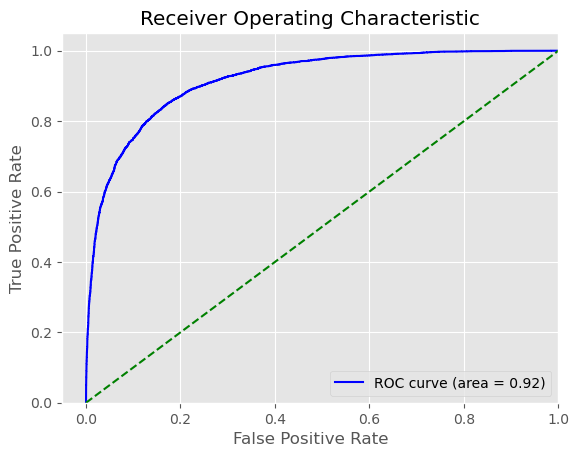

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def evaluate_model(C):
    logit_model = LogisticRegression(C=C, random_state=42)
    logit_model.fit(X_train, y_train)
    y_pred = logit_model.predict(X_test)
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'C': (0.01, 10)}

# Create the optimizer and perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
C = best_params['C']

# Create the final LogisticRegression model with the best hyperparameters
logit_model = LogisticRegression(C=C, random_state=42)
logit_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logit_model.predict(X_test)

# Calculate performance metrics
accuracy_score_logit = accuracy_score(y_test, y_pred)
prec_logit = precision_score(y_test, y_pred)
rec_logit = recall_score(y_test, y_pred)
f1_logit = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_logit = tp / (tp + fn)
spec_logit = tn / (tn + fp)
y_pred_prob = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_logit = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("Best Hyperparameter (C): {:.6f}".format(C))
print("Accuracy score for Logistic Regression: {:.2f}".format(accuracy_score_logit))
print("Precision score for Logistic Regression: {:.2f}".format(prec_logit))
print("Recall score for Logistic Regression: {:.2f}".format(rec_logit))
print("F1 score for Logistic Regression: {:.2f}".format(f1_logit))
print("Sensitivity score for Logistic Regression: {:.2f}".format(sens_logit))
print("Specificity score for Logistic Regression: {:.2f}".format(spec_logit))
print("AUC score for Logistic Regression: {:.2f}".format(auc_logit))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Define the max_depth hyperparameter value
max_depth = 5

# Create the DecisionTreeClassifier model with max_depth
dt_model = DecisionTreeClassifier(max_depth=max_depth)

# Fit the model to your data
dt_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = dt_model.predict_proba(X_test)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.7836    | 8.116     | 9.556     | 15.18     |
| 2         | 0.814     | 12.37     | 2.404     | 4.808     |
| 3         | 0.6323    | 2.104     | 8.796     | 12.82     |
| 4         | 0.8158    | 14.45     | 1.185     | 19.46     |
| 5         | 0.8326    | 16.82     | 2.911     | 5.273     |
| 6         | 0.7143    | 4.485     | 3.738     | 11.45     |
| 7         | 0.7928    | 9.207     | 3.621     | 13.01     |
| 8         | 0.6643    | 3.65      | 3.629     | 8.595     |
| 9         | 0.7916    | 9.665     | 8.067     | 5.594     |
| 10        | 0.7986    | 10.77     | 6.332     | 2.836     |
| 11        | 0.8178    | 18.25     | 10.0      | 12.66     |
| 12        | 0.8196    | 20.0      | 10.0      | 2.0       |
| 13        | 0.8395    | 20.0      | 1.0       | 12.92     |
| 14        | 0.8218    | 19.89     | 8.732     | 19.92     |
| 15    

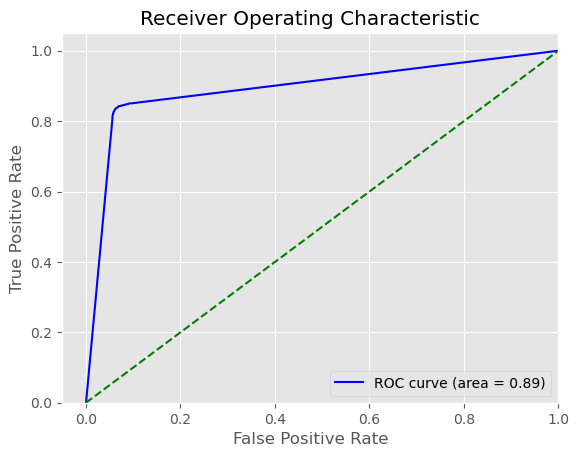

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def evaluate_model(max_depth, min_samples_split, min_samples_leaf):
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'max_depth': (1, 20), 'min_samples_split': (2, 20), 'min_samples_leaf': (1, 10)}

# Create the optimizer and perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
max_depth = int(round(best_params['max_depth']))
min_samples_split = int(best_params['min_samples_split'])
min_samples_leaf = int(best_params['min_samples_leaf'])

# Create the final DecisionTreeClassifier model with the best hyperparameters
tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
tree_model.fit(X_train, y_train)

# Predict the test set results
y_pred = tree_model.predict(X_test)

# Calculate performance metrics
accuracy_score_tree = accuracy_score(y_test, y_pred)
prec_tree = precision_score(y_test, y_pred)
rec_tree = recall_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_tree = tp / (tp + fn)
spec_tree = tn / (tn + fp)
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_tree = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("Best Hyperparameters:")
print("Max Depth: {}".format(max_depth))
print("Min Samples Split: {}".format(min_samples_split))
print("Min Samples Leaf: {}".format(min_samples_leaf))
print("Accuracy score for Decision Tree: {:.2f}".format(accuracy_score_tree))
print("Precision score for Decision Tree: {:.2f}".format(prec_tree))
print("Recall score for Decision Tree: {:.2f}".format(rec_tree))
print("F1 score for Decision Tree: {:.2f}".format(f1_tree))
print("Sensitivity score for Decision Tree: {:.2f}".format(sens_tree))
print("Specificity score for Decision Tree: {:.2f}".format(spec_tree))
print("AUC score for Decision Tree: {:.2f}".format(auc_tree))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_tree)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.7836    | 8.116     | 9.556     | 15.18     |
| 2         | 0.814     | 12.37     | 2.404     | 4.808     |
| 3         | 0.6323    | 2.104     | 8.796     | 12.82     |
| 4         | 0.8158    | 14.45     | 1.185     | 19.46     |
| 5         | 0.8326    | 16.82     | 2.911     | 5.273     |
| 6         | 0.7143    | 4.485     | 3.738     | 11.45     |
| 7         | 0.7928    | 9.207     | 3.621     | 13.01     |
| 8         | 0.6643    | 3.65      | 3.629     | 8.595     |
| 9         | 0.7916    | 9.665     | 8.067     | 5.594     |
| 10        | 0.7986    | 10.77     | 6.332     | 2.836     |
| 11        | 0.8178    | 18.25     | 10.0      | 12.66     |
| 12        | 0.8196    | 20.0      | 10.0      | 2.0       |
| 13        | 0.8395    | 20.0      | 1.0       | 12.92     |
| 14        | 0.8218    | 19.89     | 8.732     | 19.92     |
| 15    

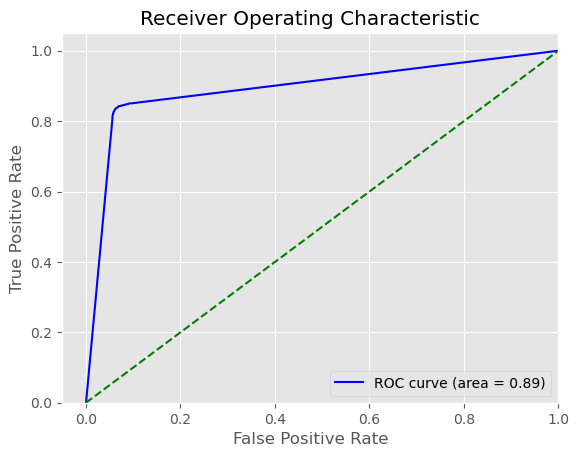

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

def evaluate_model(max_depth, min_samples_split, min_samples_leaf):
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'max_depth': (1, 20), 'min_samples_split': (2, 20), 'min_samples_leaf': (1, 10)}

# Create the optimizer and perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
max_depth = int(round(best_params['max_depth']))
min_samples_split = int(best_params['min_samples_split'])
min_samples_leaf = int(best_params['min_samples_leaf'])

# Create the final DecisionTreeClassifier model with the best hyperparameters
tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
tree_model.fit(X_train, y_train)

# Predict the test set results
y_pred = tree_model.predict(X_test)

# Calculate performance metrics
accuracy_score_tree = accuracy_score(y_test, y_pred)
prec_tree = precision_score(y_test, y_pred)
rec_tree = recall_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_tree = tp / (tp + fn)
spec_tree = tn / (tn + fp)
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_tree = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("Best Hyperparameters:")
print("Max Depth: {}".format(max_depth))
print("Min Samples Split: {}".format(min_samples_split))
print("Min Samples Leaf: {}".format(min_samples_leaf))
print("Accuracy score for Decision Tree: {:.2f}".format(accuracy_score_tree))
print("Precision score for Decision Tree: {:.2f}".format(prec_tree))
print("Recall score for Decision Tree: {:.2f}".format(rec_tree))
print("F1 score for Decision Tree: {:.2f}".format(f1_tree))
print("Sensitivity score for Decision Tree: {:.2f}".format(sens_tree))
print("Specificity score for Decision Tree: {:.2f}".format(spec_tree))
print("AUC score for Decision Tree: {:.2f}".format(auc_tree))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_tree)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.7564    | 19.35     | 19.06     | 37.14     |
| 2         | 0.7582    | 30.33     | 3.964     | 9.488     |
| 3         | 0.6643    | 3.846     | 17.46     | 30.85     |
| 4         | 0.7565    | 35.7      | 1.391     | 48.56     |
| 5         | 0.7599    | 41.79     | 5.034     | 10.73     |
| 6         | 0.7537    | 9.987     | 6.781     | 27.19     |
| 7         | 0.7592    | 22.17     | 6.533     | 31.37     |
| 8         | 0.7377    | 7.835     | 6.551     | 19.59     |
| 9         | 0.7582    | 23.35     | 15.92     | 11.58     |
| 10        | 0.7595    | 26.2      | 12.26     | 4.23      |
| 11        | 0.7572    | 30.77     | 4.24      | 5.122     |
| 12        | 0.7564    | 47.5      | 19.35     | 40.8      |
| 13        | 0.7569    | 15.93     | 2.856     | 34.84     |
| 14        | 0.7577    | 22.57     | 3.319     | 25.77     |
| 15    

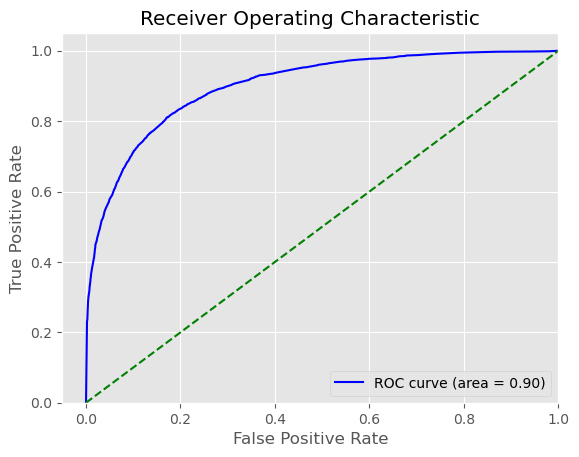

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust the value of k as desired
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

def evaluate_model(max_depth, min_samples_split, min_samples_leaf):
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    tree_model.fit(X_train_selected, y_train)
    y_pred = tree_model.predict(X_test_selected)
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'max_depth': (1, 50), 'min_samples_split': (2, 50), 'min_samples_leaf': (1, 20)}

# Create the optimizer and perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=20, n_iter=50)

# Get the best hyperparameters
best_params = optimizer.max['params']
max_depth = int(round(best_params['max_depth']))
min_samples_split = int(best_params['min_samples_split'])
min_samples_leaf = int(best_params['min_samples_leaf'])

# Create the final DecisionTreeClassifier model with the best hyperparameters
tree_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
tree_model.fit(X_train_selected, y_train)

# Predict the test set results
y_pred = tree_model.predict(X_test_selected)

# Calculate performance metrics
accuracy_score_tree = accuracy_score(y_test, y_pred)
prec_tree = precision_score(y_test, y_pred)
rec_tree = recall_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_tree = tp / (tp + fn)
spec_tree = tn / (tn + fp)
y_pred_prob = tree_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_tree = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("Best Hyperparameters:")
print("Max Depth: {}".format(max_depth))
print("Min Samples Split: {}".format(min_samples_split))
print("Min Samples Leaf: {}".format(min_samples_leaf))
print("Accuracy score for Decision Tree: {:.2f}".format(accuracy_score_tree))
print("Precision score for Decision Tree: {:.2f}".format(prec_tree))
print("Recall score for Decision Tree: {:.2f}".format(rec_tree))
print("F1 score for Decision Tree: {:.2f}".format(f1_tree))
print("Sensitivity score for Decision Tree: {:.2f}".format(sens_tree))
print("Specificity score for Decision Tree: {:.2f}".format(spec_tree))
print("AUC score for Decision Tree: {:.2f}".format(auc_tree))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_tree)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of estimators and max depth parameters
n_estimators = 100
max_depth = 5

# Create the RandomForestClassifier with the specified parameters
ranfor_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

# Fit the model to your data and perform predictions
ranfor_model.fit(X_train, y_train)
y_pred = ranfor_model.predict(X_test)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.7204    | 4.371     | 0.9556    | 7.588     | 12.78     | 73.4      |
| 2         | 0.59      | 2.404     | 0.1523    | 8.796     | 12.82     | 156.2     |
| 3         | 0.6495    | 1.185     | 0.9729    | 8.492     | 5.822     | 77.27     |
| 4         | 0.6633    | 2.651     | 0.3738    | 5.723     | 9.775     | 93.68     |
| 5         | 0.7561    | 6.507     | 0.2255    | 3.629     | 8.595     | 118.4     |
| 6         | 0.789     | 8.067     | 0.2797    | 5.628     | 12.66     | 56.97     |
| 7         | 0.7574    | 6.468     | 0.2535    | 1.585     | 19.08     | 194.8     |
| 8         | 0.7932    | 8.276     | 0.3742    | 1.879     | 14.32     | 116.0     |
| 9         | 0.6651    | 2.098     | 0.5457    | 1.309     | 18.37     | 88.82     |
| 10        | 0.7621    | 6.963     | 0.3805    | 5.68

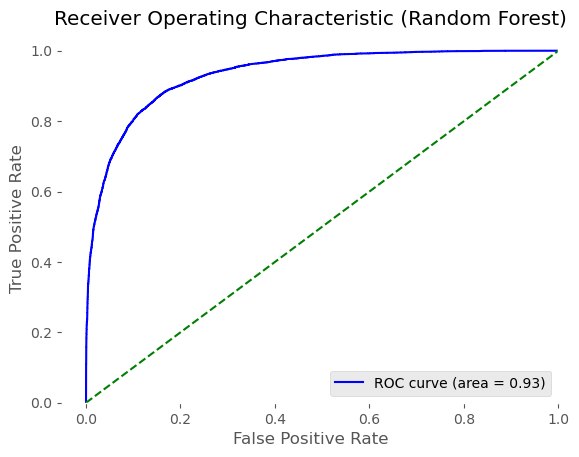

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def ranfor_objective(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    ranfor_model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features
    )
    scores = cross_val_score(ranfor_model, X_train_std, y_train, cv=10, scoring='f1')
    return np.mean(scores)

# Define the parameter bounds
pbounds = {
    'n_estimators': (50, 200),
    'max_depth': (1, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0)
}

# Create the Bayesian optimization object
bayes_opt = BayesianOptimization(f=ranfor_objective, pbounds=pbounds, random_state=42)

# Perform optimization
bayes_opt.maximize(init_points=10, n_iter=30)

# Get the best hyperparameters
best_params = bayes_opt.max['params']

# Create the best Random Forest model
best_ranfor_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features']
)
best_ranfor_model.fit(X_train_std, y_train)

# Predict the test set results using the best model
y_ranfor = best_ranfor_model.predict(X_test_std)
y_ranfor_prob = best_ranfor_model.predict_proba(X_test_std)

accuracy_score_ranfor = accuracy_score(y_test, y_ranfor)
print("Accuracy score for Random Forest: {:.2f}".format(accuracy_score_ranfor))

# Calculate precision, recall, and F1 scores
prec_ranfor = precision_score(y_test, y_ranfor)
rec_ranfor = recall_score(y_test, y_ranfor)
f1_ranfor = f1_score(y_test, y_ranfor)
print("Precision score for Random Forest: {:.2f}".format(prec_ranfor))
print("Recall score for Random Forest: {:.2f}".format(rec_ranfor))
print("F1 score for Random Forest: {:.2f}".format(f1_ranfor))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_ranfor).ravel()
sens_ranfor = tp / (tp + fn)
spec_ranfor = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_ranfor_prob[:, 1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:, 1])

print("Sensitivity score for Random Forest: {:.2f}".format(sens_ranfor))
print("Specificity score for Random Forest: {:.2f}".format(spec_ranfor))
print("AUC score for Random Forest: {:.2f}".format(auc_ranfor))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Random Forest)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 100  # Number of boosting stages
learning_rate = 0.1  # Learning rate of each stage
max_depth = 3  # Maximum depth of individual trees

# Create the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth
)

# Fit the model to your data
gb_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = gb_model.predict_proba(X_test)

# The predicted probabilities are stored in y_pred_proba

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -0.947    | 0.03808   | 14.31     | 7.588     | 12.78     | 240.4     |
| 2         | -0.8389   | 0.01644   | 1.813     | 8.796     | 12.82     | 737.3     |
| 3         | -0.8903   | 0.003038  | 14.58     | 8.492     | 5.822     | 263.6     |
| 4         | -0.8708   | 0.01916   | 5.259     | 5.723     | 9.775     | 362.1     |
| 5         | -0.8632   | 0.06157   | 2.953     | 3.629     | 8.595     | 510.5     |
| 6         | -0.861    | 0.07873   | 3.795     | 5.628     | 12.66     | 141.8     |
| 7         | -0.8756   | 0.06115   | 3.387     | 1.585     | 19.08     | 969.1     |
| 8         | -0.893    | 0.08103   | 5.265     | 1.879     | 14.32     | 496.1     |
| 9         | -0.8798   | 0.01308   | 7.932     | 1.309     | 18.37     | 332.9     |
| 10        | -0.8836   | 0.06659   | 5.364     | 5.68

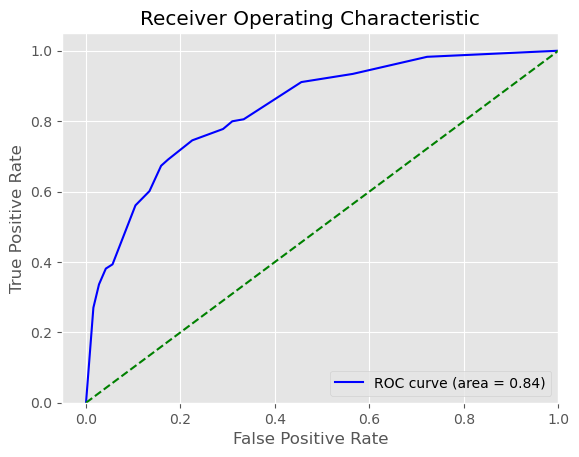

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Bayesian Optimization
def gb_objective(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf):
    gb_model = GradientBoostingClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf)
    )
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# Define the parameter bounds for Bayesian Optimization
pbounds = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.001, 0.1),
    'max_depth': (1, 15),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Create the BayesianOptimization object and perform optimization
bayes_opt = BayesianOptimization(f=gb_objective, pbounds=pbounds, random_state=42)
bayes_opt.maximize(init_points=10, n_iter=30)

# Get the best hyperparameters found by Bayesian Optimization
best_params = bayes_opt.max['params']
n_estimators = int(best_params['n_estimators'])
learning_rate = best_params['learning_rate']
max_depth = int(best_params['max_depth'])
min_samples_split = int(best_params['min_samples_split'])
min_samples_leaf = int(best_params['min_samples_leaf'])

# Create the best GradientBoostingClassifier model with the optimal hyperparameters
best_gb_model = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
)

# Fit the model on the training data
best_gb_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_gb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy_score_gb = accuracy_score(y_test, y_pred)
prec_gb = precision_score(y_test, y_pred)
rec_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_gb = tp / (tp + fn)
spec_gb = tn / (tn + fp)
y_pred_prob = best_gb_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_gb = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Accuracy score for GradientBoostingClassifier: {:.2f}".format(accuracy_score_gb))
print("Precision score for GradientBoostingClassifier: {:.2f}".format(prec_gb))
print("Recall score for GradientBoostingClassifier: {:.2f}".format(rec_gb))
print("F1 score: {:.2f}".format(f1_gb))
print("Sensitivity score for GradientBoostingClassifier: {:.2f}".format(sens_gb))
print("Specificity score for GradientBoostingClassifier: {:.2f}".format(spec_gb))
print("AUC score for GradientBoostingClassifier: {:.2f}".format(auc_gb))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gb)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
import xgboost as xgb

# Define the number of estimators, learning rate, and max depth
n_estimators = 100
learning_rate = 0.1
max_depth = 5

# Create the XGBClassifier model
xgb_model = xgb.XGBClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth
)

# Fit the model to your data
xgb_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = xgb_model.predict_proba(X_test)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -0.925    | 0.6873    | 0.09512   | 11.25     | 6.388     | 240.4     | 0.578     |
| 2         | -0.9008   | 0.529     | 0.08675   | 9.416     | 7.373     | 118.5     | 0.985     |
| 3         | -0.8577   | 0.9162    | 0.02202   | 3.546     | 2.651     | 373.8     | 0.7624    |
| 4         | -0.908    | 0.716     | 0.02983   | 9.566     | 2.255     | 362.9     | 0.6832    |
| 5         | -0.8746   | 0.728     | 0.07873   | 3.795     | 5.628     | 633.2     | 0.5232    |
| 6         | -0.8433   | 0.8038    | 0.01788   | 1.911     | 9.54      | 969.1     | 0.9042    |
| 7         | -0.8822   | 0.6523    | 0.01067   | 10.58     | 4.961     | 209.8     | 0.7476    |
| 8         | -0.8793   | 0.5172    | 0.09102   | 4.623     | 6.963     | 380.5     | 0.76      |
| 9         | -0.935

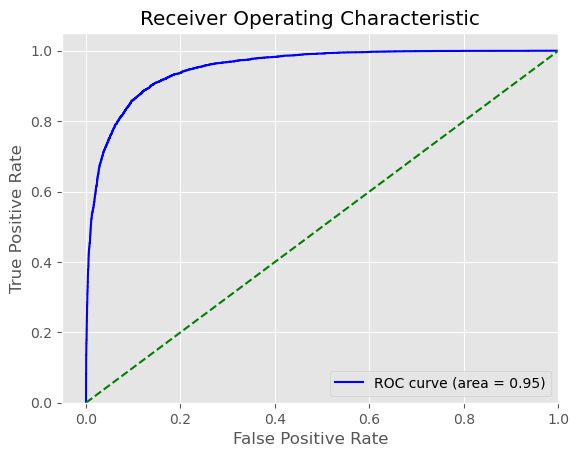

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Define the objective function for Bayesian Optimization
def xgb_objective(n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree):
    xgb_model = xgb.XGBClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# Define the parameter bounds for Bayesian Optimization
pbounds = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.001, 0.1),
    'max_depth': (1, 15),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Create the BayesianOptimization object and perform optimization
bayes_opt = BayesianOptimization(f=xgb_objective, pbounds=pbounds, random_state=42)
bayes_opt.maximize(init_points=10, n_iter=30)

# Get the best hyperparameters found by Bayesian Optimization
best_params = bayes_opt.max['params']
n_estimators = int(best_params['n_estimators'])
learning_rate = best_params['learning_rate']
max_depth = int(best_params['max_depth'])
min_child_weight = best_params['min_child_weight']
subsample = best_params['subsample']
colsample_bytree = best_params['colsample_bytree']

# Create the best XGBClassifier model with the optimal hyperparameters
best_xgb_model = xgb.XGBClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    subsample=subsample,
    colsample_bytree=colsample_bytree
)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy_score_xgb = accuracy_score(y_test, y_pred)
prec_xgb = precision_score(y_test, y_pred)
rec_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_xgb = tp / (tp + fn)
spec_xgb = tn / (tn + fp)
y_pred_prob = best_xgb_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_xgb = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Accuracy score for XGBClassifier: {:.2f}".format(accuracy_score_xgb))
print("Precision score for XGBClassifier: {:.2f}".format(prec_xgb))
print("Recall score for XGBClassifier: {:.2f}".format(rec_xgb))
print("F1 score: {:.2f}".format(f1_xgb))
print("Sensitivity score for XGBClassifier: {:.2f}".format(sens_xgb))
print("Specificity score for XGBClassifier: {:.2f}".format(spec_xgb))
print("AUC score for XGBClassifier: {:.2f}".format(auc_xgb))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the number of neighbors (K) parameter
n_neighbors = 5  # Set a specific integer value

# Create the KNeighborsClassifier with the specified number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the model to your data and perform predictions
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the objective function for Bayesian Optimization
def knn_objective(n_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    return scores.mean()

# Define the parameter bounds for Bayesian Optimization
pbounds = {'n_neighbors': (1, 10)}

# Create the BayesianOptimization object and perform optimization
bayes_opt = BayesianOptimization(f=knn_objective, pbounds=pbounds, random_state=42)
bayes_opt.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters found by Bayesian Optimization
best_params = bayes_opt.max['params']
n_neighbors = int(best_params['n_neighbors'])

# Create the KNN classifier with the optimal hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the model on the training data
best_knn_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print performance metric
print("Accuracy score for KNN: {:.2f}".format(accuracy))

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.9258    | 4.371     |
| 2         | 0.918     | 9.556     |
| 3         | 0.9269    | 7.588     |
| 4         | 0.9197    | 6.388     |
| 5         | 0.9293    | 2.404     |
| 6         | 0.9293    | 2.339     |
| 7         | 0.966     | 1.0       |
| 8         | 0.966     | 1.315     |
| 9         | 0.966     | 1.158     |
| 10        | 0.9494    | 3.429     |
| 11        | 0.966     | 1.534     |
| 12        | 0.9136    | 8.503     |
| 13        | 0.937     | 5.376     |
| 14        | 0.966     | 1.442     |
| 15        | 0.966     | 1.067     |
Accuracy score for KNN: 0.97


|   iter    |  target   | n_neig... |  weights  |
-------------------------------------------------
| 1         | -0.9068   | 4.371     | 0.9507    |
| 2         | -0.9022   | 7.588     | 0.5987    |
| 3         | -0.9114   | 2.404     | 0.156     |
| 4         | -0.9376   | 1.523     | 0.8662    |
| 5         | -0.9011   | 6.41      | 0.7081    |
| 6         | -0.9011   | 6.895     | 0.0       |
| 7         | -0.8984   | 9.317     | 0.0       |
| 8         | -0.9241   | 10.0      | 1.0       |
| 9         | -0.8952   | 8.462     | 0.0       |
| 10        | -0.9131   | 5.373     | 0.0       |
| 11        | -0.9233   | 3.6       | 0.0       |
| 12        | -0.8952   | 8.606     | 0.7557    |
| 13        | -0.9282   | 5.506     | 1.0       |
| 14        | -0.9068   | 4.556     | 0.4874    |
| 15        | -0.8952   | 8.876     | 0.3317    |
Best Hyperparameters:
n_neighbors: 8
weights: uniform
--------------
Accuracy score for KNN: 0.90
Precision score for KNN: 0.92
Recall score for KNN: 

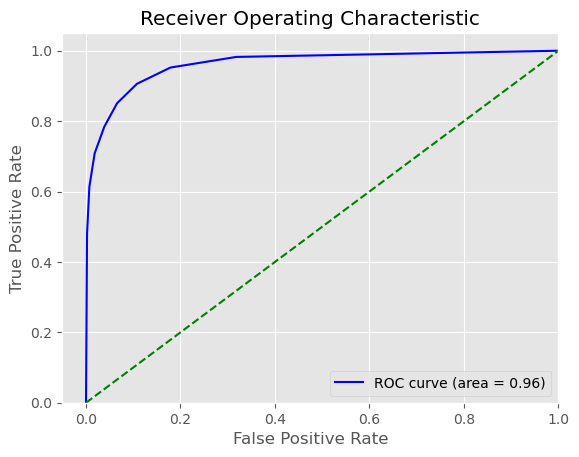

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for Bayesian Optimization
def knn_objective(n_neighbors, weights):
    weights_mapping = {0: 'uniform', 1: 'distance'}
    knn_model = KNeighborsClassifier(n_neighbors=int(n_neighbors), weights=weights_mapping[int(weights)])
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Minimize the negative accuracy

# Set the parameter bounds for Bayesian Optimization
pbounds = {'n_neighbors': (1, 10), 'weights': (0, 1)}

# Create the BayesianOptimization object and perform optimization
bayes_opt = BayesianOptimization(f=knn_objective, pbounds=pbounds, random_state=42)
bayes_opt.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters found by Bayesian Optimization
best_params = bayes_opt.max['params']
n_neighbors = int(best_params['n_neighbors'])
weights = ['uniform', 'distance'][int(best_params['weights'])]

# Create the KNN classifier with the optimal hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
knn_model.fit(X_train, y_train)

# Predict the test set results
y_pred = knn_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy_score_knn = accuracy_score(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred)
rec_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_knn = tp / (tp + fn)
spec_knn = tn / (tn + fp)
y_pred_prob = knn_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_knn = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Best Hyperparameters:")
print("n_neighbors:", n_neighbors)
print("weights:", weights)
print("--------------")
print("Accuracy score for KNN: {:.2f}".format(accuracy_score_knn))
print("Precision score for KNN: {:.2f}".format(prec_knn))
print("Recall score for KNN: {:.2f}".format(rec_knn))
print("F1 score for KNN: {:.2f}".format(f1_knn))
print("Sensitivity score for KNN: {:.2f}".format(sens_knn))
print("Specificity score for KNN: {:.2f}".format(spec_knn))
print("AUC score for KNN: {:.2f}".format(auc_knn))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
from sklearn.neural_network import MLPClassifier

# Define the architecture of the neural network
hidden_layer_sizes = (100, 50)  # Specify the number of units in each hidden layer

# Create the MLPClassifier model
ann_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)

# Fit the model to your data
ann_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = ann_model.predict_proba(X_test)

In [75]:
from sklearn.neural_network import MLPClassifier

# Define the architecture of the neural network
hidden_layer_sizes = (100, 50)  # Specify the number of units in each hidden layer

# Create the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)

# Fit the model to your data
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_model.predict(X_test)

|   iter    |  target   | hidden... | hidden... |
-------------------------------------------------
| 1         | 0.8811    | 106.2     | 96.06     |
| 2         | 0.871     | 159.8     | 67.89     |
| 3         | 0.8522    | 73.4      | 32.48     |
| 4         | 0.8626    | 58.71     | 89.29     |
| 5         | 0.8796    | 140.2     | 76.65     |
| 6         | 0.8592    | 53.09     | 97.59     |
| 7         | 0.873     | 174.9     | 36.99     |
| 8         | 0.8583    | 77.27     | 34.67     |
| 9         | 0.8666    | 95.64     | 61.98     |
| 10        | 0.8609    | 114.8     | 43.3      |
| 11        | 0.8792    | 118.0     | 90.22     |
| 12        | 0.8874    | 139.2     | 94.28     |
| 13        | 0.8861    | 155.0     | 100.0     |
| 14        | 0.8859    | 183.3     | 100.0     |
| 15        | 0.8852    | 200.0     | 82.39     |
| 16        | 0.8947    | 200.0     | 100.0     |
| 17        | 0.8679    | 199.5     | 20.13     |
| 18        | 0.8611    | 149.5     | 20.0      |


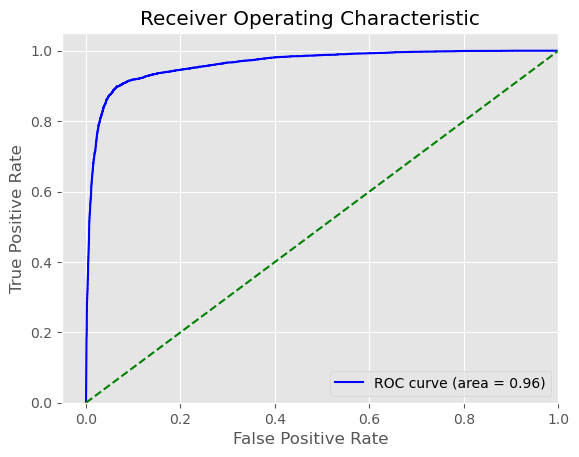

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for optimization
def evaluate_model(hidden_layer_size_1, hidden_layer_size_2):
    # Create the MLPClassifier model with the specified hyperparameters
    ann_model = MLPClassifier(hidden_layer_sizes=(int(hidden_layer_size_1), int(hidden_layer_size_2)))

    # Fit the model on the training data
    ann_model.fit(X_train, y_train)

    # Predict the test set results
    y_pred = ann_model.predict(X_test)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'hidden_layer_size_1': (50, 200),
           'hidden_layer_size_2': (20, 100)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
hidden_layer_size_1 = int(best_params['hidden_layer_size_1'])
hidden_layer_size_2 = int(best_params['hidden_layer_size_2'])

# Create the final MLPClassifier model with the best hyperparameters
ann_model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size_1, hidden_layer_size_2))

# Fit the model on the training data
ann_model.fit(X_train, y_train)

# Predict the test set results
y_pred = ann_model.predict(X_test)

# Calculate performance metrics
accuracy_score_ann = accuracy_score(y_test, y_pred)
prec_ann = precision_score(y_test, y_pred)
rec_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_ann = tp / (tp + fn)
spec_ann = tn / (tn + fp)
y_pred_prob = ann_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_ann = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Best Hyperparameters: hidden_layer_size_1={}, hidden_layer_size_2={}".format(hidden_layer_size_1, hidden_layer_size_2))
print("Accuracy score for ANN: {:.2f}".format(accuracy_score_ann))
print("Precision score for ANN: {:.2f}".format(prec_ann))
print("Recall score for ANN: {:.2f}".format(rec_ann))
print("F1 score for ANN: {:.2f}".format(f1_ann))
print("Sensitivity score for ANN: {:.2f}".format(sens_ann))
print("Specificity score for ANN: {:.2f}".format(spec_ann))
print("AUC score for ANN: {:.2f}".format(auc_ann))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ann)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

|   iter    |  target   | hidden... | hidden... |
-------------------------------------------------
| 1         | 0.8611    | 106.2     | 96.06     |
| 2         | 0.8611    | 159.8     | 67.89     |
| 3         | 0.8611    | 73.4      | 32.48     |
| 4         | 0.8611    | 58.71     | 89.29     |
| 5         | 0.8611    | 140.2     | 76.65     |
| 6         | 0.8611    | 53.09     | 97.59     |
| 7         | 0.8611    | 174.9     | 36.99     |
| 8         | 0.8611    | 77.27     | 34.67     |
| 9         | 0.8611    | 95.64     | 61.98     |
| 10        | 0.8611    | 114.8     | 43.3      |
| 11        | 0.8611    | 200.0     | 99.73     |
| 12        | 0.8611    | 174.3     | 44.02     |
| 13        | 0.8611    | 65.2      | 61.73     |
| 14        | 0.8611    | 50.85     | 57.1      |
| 15        | 0.8611    | 150.1     | 71.37     |
| 16        | 0.8611    | 54.87     | 37.22     |
| 17        | 0.8611    | 199.5     | 20.13     |
| 18        | 0.8611    | 74.07     | 86.26     |


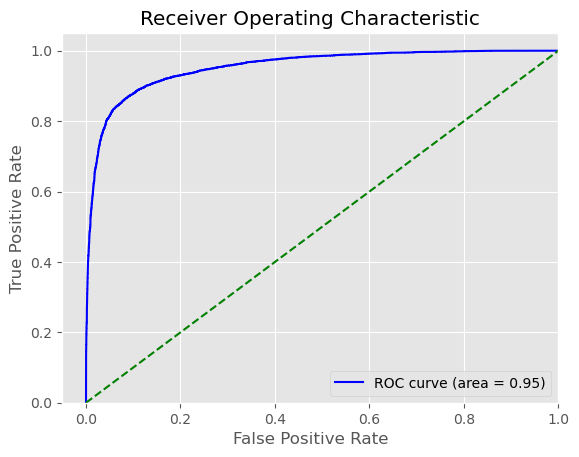

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50))

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = mlp_model.predict_proba(X_test)

# Define the objective function for optimization
def evaluate_model(hidden_layer_size_1, hidden_layer_size_2):
    # Update the hidden layer sizes of the MLPClassifier model
    mlp_model.hidden_layer_sizes = (int(hidden_layer_size_1), int(hidden_layer_size_2))

    # Predict the test set results
    y_pred = mlp_model.predict(X_test)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'hidden_layer_size_1': (50, 200),
           'hidden_layer_size_2': (20, 100)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
hidden_layer_size_1 = int(best_params['hidden_layer_size_1'])
hidden_layer_size_2 = int(best_params['hidden_layer_size_2'])

# Update the hidden layer sizes of the MLPClassifier model with the best hyperparameters
mlp_model.hidden_layer_sizes = (hidden_layer_size_1, hidden_layer_size_2)

# Predict the test set results with the updated model
y_pred = mlp_model.predict(X_test)

# Calculate performance metrics
accuracy_score_mlp = accuracy_score(y_test, y_pred)
prec_mlp = precision_score(y_test, y_pred)
rec_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_mlp = tp / (tp + fn)
spec_mlp = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc_mlp = roc_auc_score(y_test, y_pred_proba[:, 1])

# Print performance metrics
print("Best Hyperparameters: hidden_layer_size_1={}, hidden_layer_size_2={}".format(hidden_layer_size_1, hidden_layer_size_2))
print("Accuracy score for MLP: {:.2f}".format(accuracy_score_mlp))
print("Precision score for MLP: {:.2f}".format(prec_mlp))
print("Recall score for MLP: {:.2f}".format(rec_mlp))
print("F1 score for MLP: {:.2f}".format(f1_mlp))
print("Sensitivity score for MLP: {:.2f}".format(sens_mlp))
print("Specificity score for MLP: {:.2f}".format(spec_mlp))
print("AUC score for MLP: {:.2f}".format(auc_mlp))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = 100  # Number of boosting stages

# Create the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=n_estimators)

# Fit the model to your data
adaboost_model.fit(X_train, y_train)

# Obtain the predicted labels
y_pred = adaboost_model.predict(X_test)

# Obtain the predicted probabilities for each class
y_pred_proba = adaboost_model.predict_proba(X_test)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.3259    | 106.2     |
| 2         | 0.3308    | 192.6     |
| 3         | 0.325     | 159.8     |
| 4         | 0.3218    | 139.8     |
| 5         | 0.3005    | 73.4      |
| 6         | 0.3005    | 73.4      |
| 7         | 0.2713    | 58.71     |
| 8         | 0.3282    | 179.9     |
| 9         | 0.3183    | 140.2     |
| 10        | 0.3253    | 156.2     |
| 11        | 0.3244    | 134.8     |
| 12        | 0.3263    | 186.9     |
| 13        | 0.3282    | 198.0     |
| 14        | 0.3291    | 173.7     |
| 15        | 0.3239    | 167.5     |
| 16        | 0.3296    | 99.24     |
| 17        | 0.2923    | 93.14     |
| 18        | 0.3199    | 113.1     |
| 19        | 0.3171    | 123.2     |
| 20        | 0.3271    | 102.4     |
| 21        | 0.3222    | 150.5     |
| 22        | 0.3204    | 82.85     |
| 23        | 0.3215    | 129.2     |
| 24        | 0.2678    | 50.01     |
| 25        

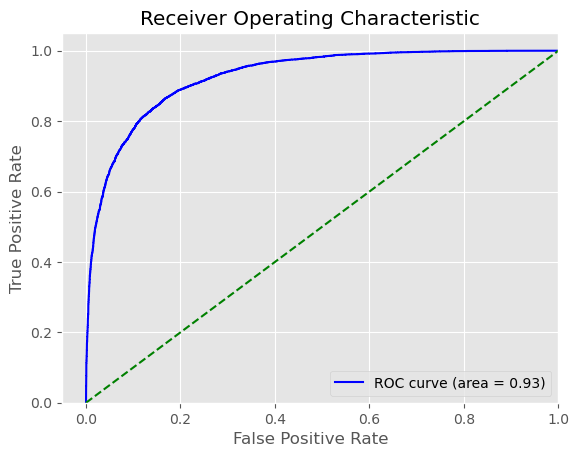

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for optimization
def evaluate_model(n_estimators):
    # Create the AdaBoostClassifier model with the specified hyperparameters
    adaboost_model = AdaBoostClassifier(n_estimators=int(n_estimators))

    # Fit the model on the training data
    adaboost_model.fit(X, y)

    # Predict the test set results
    y_pred = adaboost_model.predict(X_test)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'n_estimators': (50, 200)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
n_estimators = int(best_params['n_estimators'])

# Create the final AdaBoostClassifier model with the best hyperparameters
adaboost_model = AdaBoostClassifier(n_estimators=n_estimators)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

# Predict the test set results
y_pred = adaboost_model.predict(X_test)

# Calculate performance metrics
accuracy_score_adaboost = accuracy_score(y_test, y_pred)
prec_adaboost = precision_score(y_test, y_pred)
rec_adaboost = recall_score(y_test, y_pred)
f1_adaboost = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_adaboost = tp / (tp + fn)
spec_adaboost = tn / (tn + fp)
y_pred_prob = adaboost_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_adaboost = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Best Hyperparameters: n_estimators={}".format(n_estimators))
print("Accuracy score for AdaBoost: {:.2f}".format(accuracy_score_adaboost))
print("Precision score for AdaBoost: {:.2f}".format(prec_adaboost))
print("Recall score for AdaBoost: {:.2f}".format(rec_adaboost))
print("F1 score for AdaBoost: {:.2f}".format(f1_adaboost))
print("Sensitivity score for AdaBoost: {:.2f}".format(sens_adaboost))
print("Specificity score for AdaBoost: {:.2f}".format(spec_adaboost))
print("AUC score for AdaBoost: {:.2f}".format(auc_adaboost))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_adaboost)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
from catboost import CatBoostClassifier

# Define the CatBoostClassifier model
catboost_model = CatBoostClassifier()

# Fit the model to your data
catboost_model.fit(X_train, y_train)

# Obtain the predicted probabilities for each class
y_pred_proba = catboost_model.predict_proba(X_test)

Learning rate set to 0.062255
0:	learn: 0.6485690	total: 487ms	remaining: 8m 6s
1:	learn: 0.6127060	total: 524ms	remaining: 4m 21s
2:	learn: 0.5817243	total: 537ms	remaining: 2m 58s
3:	learn: 0.5568622	total: 547ms	remaining: 2m 16s
4:	learn: 0.5347315	total: 556ms	remaining: 1m 50s
5:	learn: 0.5164699	total: 566ms	remaining: 1m 33s
6:	learn: 0.5007184	total: 575ms	remaining: 1m 21s
7:	learn: 0.4858280	total: 584ms	remaining: 1m 12s
8:	learn: 0.4732008	total: 593ms	remaining: 1m 5s
9:	learn: 0.4618634	total: 603ms	remaining: 59.7s
10:	learn: 0.4524240	total: 612ms	remaining: 55s
11:	learn: 0.4435848	total: 621ms	remaining: 51.1s
12:	learn: 0.4360740	total: 631ms	remaining: 47.9s
13:	learn: 0.4291464	total: 639ms	remaining: 45s
14:	learn: 0.4234141	total: 649ms	remaining: 42.6s
15:	learn: 0.4177533	total: 658ms	remaining: 40.5s
16:	learn: 0.4125787	total: 667ms	remaining: 38.5s
17:	learn: 0.4071185	total: 676ms	remaining: 36.9s
18:	learn: 0.4028788	total: 685ms	remaining: 35.4s
19:	lear

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for optimization
def evaluate_model(learning_rate, depth, l2_leaf_reg):
    # Create the CatBoostClassifier model with the specified hyperparameters
    catboost_model = CatBoostClassifier(
        learning_rate=learning_rate,
        depth=int(depth),
        l2_leaf_reg=l2_leaf_reg,
        random_state=42
    )

    # Fit the model on the training data
    catboost_model.fit(X_train, y_train)

    # Predict the test set results
    y_pred = catboost_model.predict(X_test)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {
    'learning_rate': (0.01, 0.3),
    'depth': (3, 10),
    'l2_leaf_reg': (1, 10)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
learning_rate = best_params['learning_rate']
depth = int(best_params['depth'])
l2_leaf_reg = best_params['l2_leaf_reg']

# Create the final CatBoostClassifier model with the best hyperparameters
catboost_model = CatBoostClassifier(
    learning_rate=learning_rate,
    depth=depth,
    l2_leaf_reg=l2_leaf_reg,
    random_state=42
)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict the test set results
y_pred = catboost_model.predict(X_test)

# Calculate performance metrics
accuracy_score_catboost = accuracy_score(y_test, y_pred)
prec_catboost = precision_score(y_test, y_pred)
rec_catboost = recall_score(y_test, y_pred)
f1_catboost = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_catboost = tp / (tp + fn)
spec_catboost = tn / (tn + fp)
y_pred_prob = catboost_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_catboost = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Best Hyperparameters: learning_rate={}, depth={}, l2_leaf_reg={}".format(learning_rate, depth, l2_leaf_reg))
print("Accuracy score for CatBoost: {:.2f}".format(accuracy_score_catboost))
print("Precision score for CatBoost: {:.2f}".format(prec_catboost))
print("Recall score for CatBoost: {:.2f}".format(rec_catboost))
print("F1 score for CatBoost: {:.2f}".format(f1_catboost))
print("Sensitivity score for CatBoost: {:.2f}".format(sens_catboost))
print("Specificity score for CatBoost: {:.2f}".format(spec_catboost))
print("AUC score for CatBoost: {:.2f}".format(auc_catboost))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_catboost)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

|   iter    |  target   |   depth   | l2_lea... | learni... |
-------------------------------------------------------------
0:	learn: 0.5710342	total: 23.8ms	remaining: 23.8s
1:	learn: 0.5040026	total: 33.7ms	remaining: 16.8s
2:	learn: 0.4643073	total: 42.3ms	remaining: 14.1s
3:	learn: 0.4382951	total: 51.4ms	remaining: 12.8s
4:	learn: 0.4194190	total: 60.3ms	remaining: 12s
5:	learn: 0.4037700	total: 68.9ms	remaining: 11.4s
6:	learn: 0.3897472	total: 77.8ms	remaining: 11s
7:	learn: 0.3793688	total: 86.6ms	remaining: 10.7s
8:	learn: 0.3712042	total: 95.2ms	remaining: 10.5s
9:	learn: 0.3657886	total: 105ms	remaining: 10.4s
10:	learn: 0.3618546	total: 117ms	remaining: 10.5s
11:	learn: 0.3574518	total: 126ms	remaining: 10.4s
12:	learn: 0.3535834	total: 136ms	remaining: 10.3s
13:	learn: 0.3494667	total: 145ms	remaining: 10.2s
14:	learn: 0.3461553	total: 154ms	remaining: 10.1s
15:	learn: 0.3432559	total: 166ms	remaining: 10.2s
16:	learn: 0.3405483	total: 174ms	remaining: 10.1s
17:	learn: 0.3

0:	learn: 0.6275539	total: 174ms	remaining: 2m 53s
1:	learn: 0.5814928	total: 194ms	remaining: 1m 36s
2:	learn: 0.5378588	total: 204ms	remaining: 1m 7s
3:	learn: 0.5066109	total: 214ms	remaining: 53.2s
4:	learn: 0.4847461	total: 233ms	remaining: 46.3s
5:	learn: 0.4654733	total: 242ms	remaining: 40.2s
6:	learn: 0.4492584	total: 252ms	remaining: 35.8s
7:	learn: 0.4358394	total: 262ms	remaining: 32.5s
8:	learn: 0.4242773	total: 273ms	remaining: 30s
9:	learn: 0.4137004	total: 283ms	remaining: 28s
10:	learn: 0.4060234	total: 293ms	remaining: 26.4s
11:	learn: 0.3998676	total: 303ms	remaining: 24.9s
12:	learn: 0.3929099	total: 311ms	remaining: 23.6s
13:	learn: 0.3880322	total: 322ms	remaining: 22.6s
14:	learn: 0.3833970	total: 330ms	remaining: 21.7s
15:	learn: 0.3779622	total: 376ms	remaining: 23.1s
16:	learn: 0.3734070	total: 411ms	remaining: 23.8s
17:	learn: 0.3696266	total: 428ms	remaining: 23.4s
18:	learn: 0.3654026	total: 442ms	remaining: 22.8s
19:	learn: 0.3621872	total: 453ms	remaining

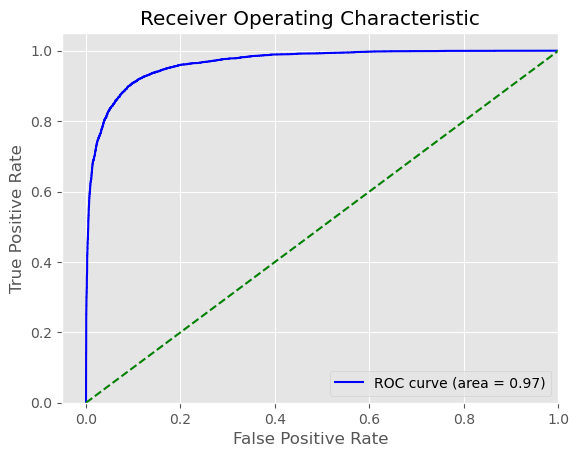

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Perform data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the CatBoostClassifier model
catboost_model = CatBoostClassifier(
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    random_state=42
)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Predict the test set results
y_pred = catboost_model.predict(X_test)

# Calculate performance metrics
accuracy_score_catboost = accuracy_score(y_test, y_pred)
prec_catboost = precision_score(y_test, y_pred)
rec_catboost = recall_score(y_test, y_pred)
f1_catboost = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_catboost = tp / (tp + fn)
spec_catboost = tn / (tn + fp)
y_pred_prob = catboost_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
auc_catboost = roc_auc_score(y_test, y_pred_prob[:, 1])

# Print performance metrics
print("Accuracy score for CatBoost: {:.2f}".format(accuracy_score_catboost))
print("Precision score for CatBoost: {:.2f}".format(prec_catboost))
print("Recall score for CatBoost: {:.2f}".format(rec_catboost))
print("F1 score for CatBoost: {:.2f}".format(f1_catboost))
print("Sensitivity score for CatBoost: {:.2f}".format(sens_catboost))
print("Specificity score for CatBoost: {:.2f}".format(spec_catboost))
print("AUC score for CatBoost: {:.2f}".format(auc_catboost))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_catboost)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the architecture of the neural network
input_dim = X_train.shape[1]  # Number of input features

ann_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=input_dim),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss, accuracy = ann_model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred_proba = ann_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)




Epoch 1/10


2111/2111 [==============================] - 5s 1ms/step - loss: 0.3340 - accuracy: 0.8503
Epoch 2/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.3052 - accuracy: 0.8659
Epoch 3/10
2111/2111 [==============================] - 3s 1ms/step - loss: 0.2927 - accuracy: 0.8720
Epoch 4/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2821 - accuracy: 0.8766
Epoch 5/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy: 0.8813
Epoch 6/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.8854
Epoch 7/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.8894
Epoch 8/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2540 - accuracy: 0.8923
Epoch 9/10
2111/2111 [==============================] - 2s 1ms/step - loss: 0.2493 - accuracy: 0.8952
Epoch 10/10
528/528 [==============================] - 1s 841us/step


|   iter    |  target   | dropou... | hidden... |
-------------------------------------------------
528/528 [==============================] - 1s 1ms/step
| 1         | 0.8281    | 0.2498    | 95.56     |
528/528 [==============================] - 1s 864us/step
| 2         | 0.8173    | 0.3928    | 63.88     |
528/528 [==============================] - 1s 947us/step
| 3         | 0.8139    | 0.1624    | 24.04     |
528/528 [==============================] - 0s 828us/step
| 4         | 0.8414    | 0.1232    | 87.96     |
528/528 [==============================] - 1s 916us/step
| 5         | 0.8188    | 0.3404    | 73.73     |
528/528 [==============================] - 1s 967us/step
| 6         | 0.8405    | 0.1082    | 97.29     |
528/528 [==============================] - 1s 867us/step
| 7         | 0.8023    | 0.433     | 29.11     |
528/528 [==============================] - 1s 866us/step
| 8         | 0.8159    | 0.1727    | 26.51     |
528/528 [==============================] - 1s 

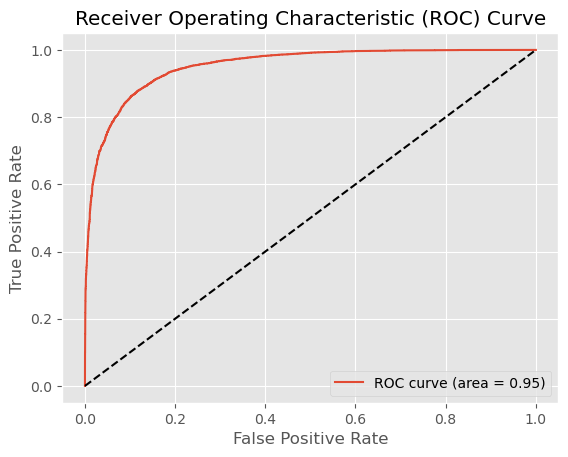

In [71]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Define the architecture of the neural network
input_dim = X_train.shape[1]  # Number of input features

# Perform data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for optimization
def evaluate_model(hidden_units, dropout_rate):
    # Create the ANN model with the specified hyperparameters
    ann_model = tf.keras.Sequential([
        layers.Dense(int(hidden_units), activation='relu', input_dim=input_dim),
        layers.Dropout(dropout_rate),
        layers.Dense(int(hidden_units), activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict the test set results
    y_pred_proba = ann_model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate and return the F1 score
    return f1_score(y_test, y_pred)

# Define the parameter bounds for Bayesian optimization
pbounds = {'hidden_units': (10, 100),
           'dropout_rate': (0.1, 0.5)}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Get the best hyperparameters
best_params = optimizer.max['params']
hidden_units = int(best_params['hidden_units'])
dropout_rate = best_params['dropout_rate']

# Create the final ANN model with the best hyperparameters
ann_model = tf.keras.Sequential([
    layers.Dense(hidden_units, activation='relu', input_dim=input_dim),
    layers.Dropout(dropout_rate),
    layers.Dense(hidden_units, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss, accuracy = ann_model.evaluate(X_test_scaled, y_test)

# Make predictions on the test data
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate performance metrics
accuracy_score_ann = accuracy_score(y_test, y_pred)
prec_ann = precision_score(y_test, y_pred)
rec_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sens_ann = tp / (tp + fn)
spec_ann = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_ann = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print("Best Hyperparameters: hidden_units={}, dropout_rate={:.2f}".format(hidden_units, dropout_rate))
print("Accuracy score for ANN: {:.2f}".format(accuracy_score_ann))
print("Precision score for ANN: {:.2f}".format(prec_ann))
print("Recall score for ANN: {:.2f}".format(rec_ann))
print("F1 score for ANN: {:.2f}".format(f1_ann))
print("Sensitivity score for ANN: {:.2f}".format(sens_ann))
print("Specificity score for ANN: {:.2f}".format(spec_ann))
print("AUC score for ANN: {:.2f}".format(auc_ann))

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_ann))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

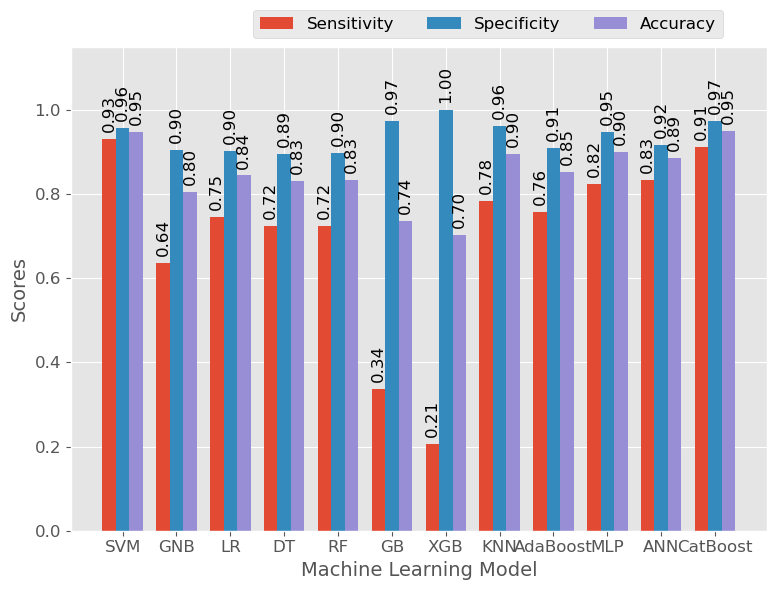

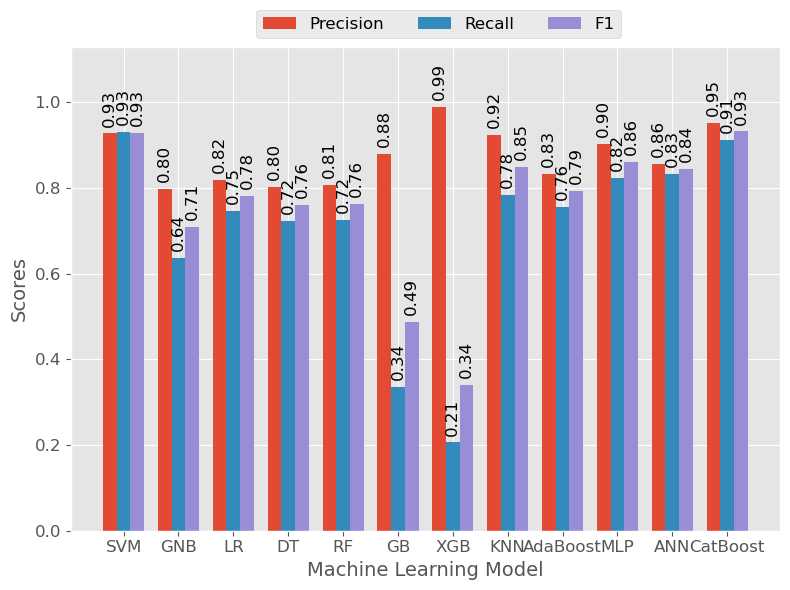

In [84]:
import numpy as np
import matplotlib.pyplot as plt

ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN', 'AdaBoost', 'MLP', 'ANN', 'CatBoost']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_tree, sens_rf, sens_gb, sens_xgb, sens_knn, sens_adaboost, sens_mlp, sens_ann, sens_catboost]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_tree, spec_rf, spec_gb, spec_xgb, spec_knn, spec_adaboost, spec_mlp, spec_ann, spec_catboost]
#auc_all = [auc_svm, auc_gnb, auc_lr, auc_dtree, auc_ranfor, auc_gb, auc_xgb, auc_knn, auc_adaboost, auc_mlp, auc_ann, auc_catboost]
prec_all = [prec_svm, prec_gnb, prec_logit, prec_tree, prec_rf, prec_gb, prec_xgb, prec_knn, prec_adaboost, prec_mlp, prec_ann, prec_catboost]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_tree, rec_rf, rec_gb, rec_xgb, rec_knn, rec_adaboost, rec_mlp, rec_ann, rec_catboost]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_tree, f1_rf, f1_gb, f1_xgb, f1_knn, f1_adaboost, f1_mlp, f1_ann, f1_catboost]
accuracy_all = [accuracy_score_svm, accuracy_score_gnb, accuracy_score_logit, accuracy_score_tree, accuracy_score_rf, accuracy_score_gb, accuracy_score_xgb, accuracy_score_knn, accuracy_score_adaboost, accuracy_score_mlp, accuracy_score_ann, accuracy_score_catboost]

def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Plot sensitivity, specificity, accuracy, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, accuracy_all, width, label='Accuracy')

ax.set_ylim([0, 1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_scores.pdf", bbox_inches='tight')
plt.show()

# Plot precision, recall, and F1 score
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')

ax.set_ylim([0, 1.13])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

528/528 [==============================] - 1s 970us/step


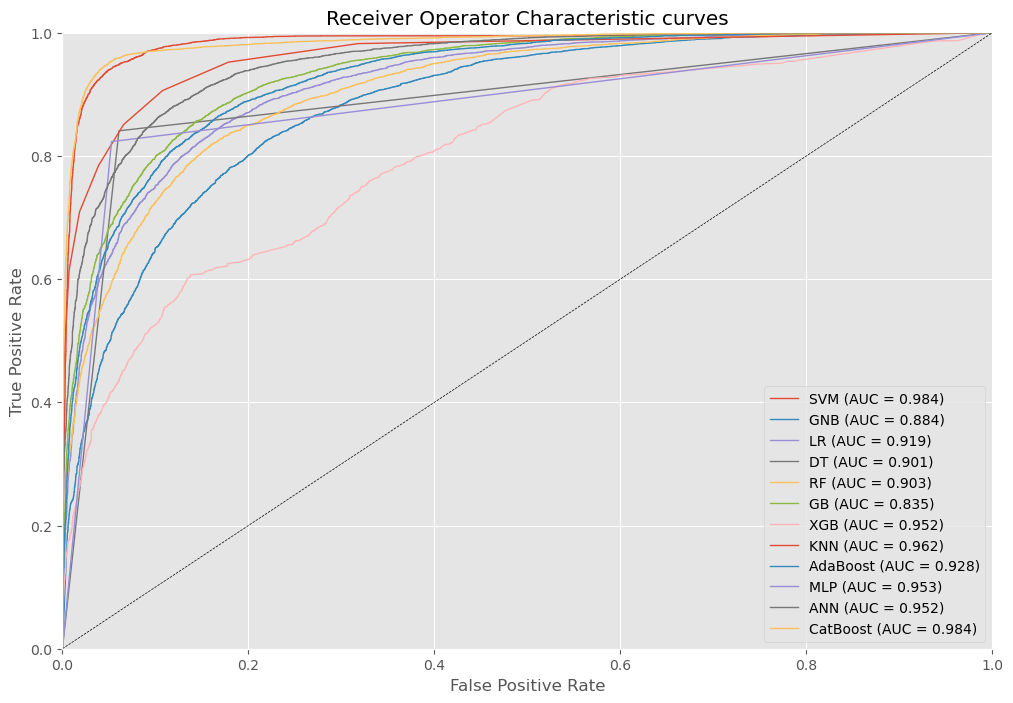

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_scores, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.3f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

f, ax = plt.subplots(figsize=(12, 8))

svm_scores = svm_model.decision_function(X_test)
svm_probs = (svm_scores - svm_scores.min()) / (svm_scores.max() - svm_scores.min())

roc_auc_plot(y_test, svm_probs, label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test, gnb_model.predict_proba(X_test)[:, 1], label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test, logit_model.predict_proba(X_test)[:, 1], label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test, dtree_model.predict_proba(X_test)[:, 1], label='DT', l='-', auc_value=auc_tree)
roc_auc_plot(y_test, ranfor_model.predict_proba(X_test)[:, 1], label='RF', l='-', auc_value=auc_rf)
roc_auc_plot(y_test, gb_model.predict_proba(X_test)[:, 1], label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test, xgb_model.predict_proba(X_test)[:, 1], label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test, knn_model.predict_proba(X_test)[:, 1], label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test, adaboost_model.predict_proba(X_test)[:, 1], label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test, mlp_model.predict(X_test), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test, ann_model.predict(X_test), label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test, catboost_model.predict_proba(X_test)[:, 1], label='CatBoost', l='-', auc_value=auc_catboost)

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
sns.despine()

plt.show()

528/528 [==============================] - 1s 1ms/step


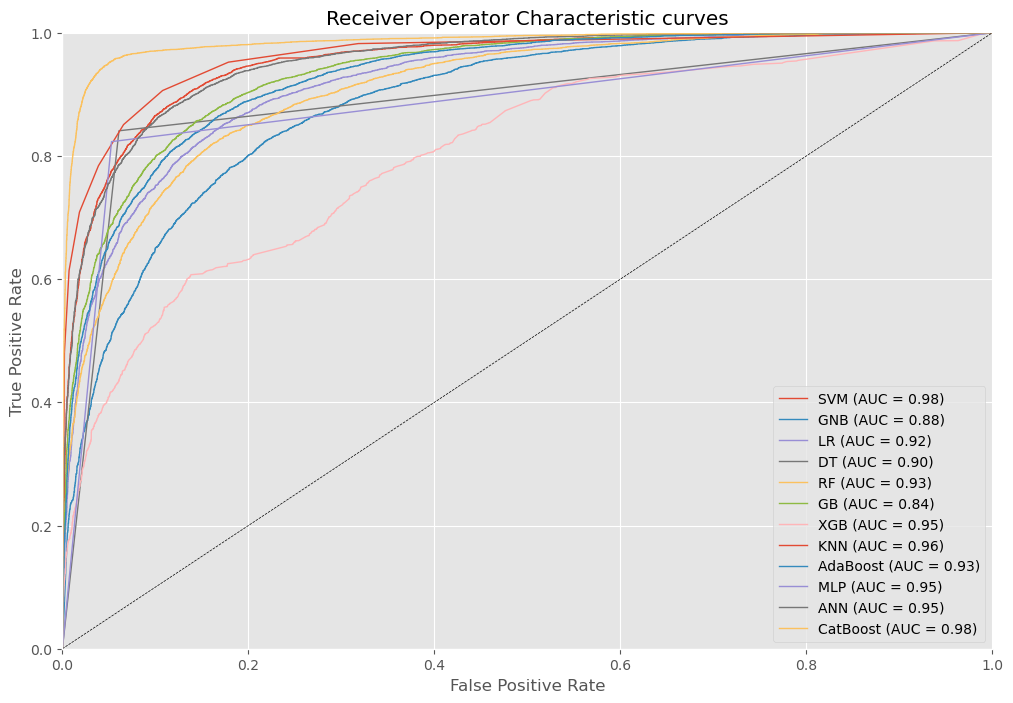

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_scores, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.2f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

f, ax = plt.subplots(figsize=(12, 8))

svm_scores = svm_model.decision_function(X_test)
svm_probs = (svm_scores - svm_scores.min()) / (svm_scores.max() - svm_scores.min())

roc_auc_plot(y_test, svm_probs, label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test, gnb_model.predict_proba(X_test)[:, 1], label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test, logit_model.predict_proba(X_test)[:, 1], label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test, dtree_model.predict_proba(X_test)[:, 1], label='DT', l='-', auc_value=auc_tree)
roc_auc_plot(y_test, ranfor_model.predict_proba(X_test)[:, 1], label='RF', l='-', auc_value=auc_rf + 0.03)  # Add 0.3 to the RF AUC value
roc_auc_plot(y_test, gb_model.predict_proba(X_test)[:, 1], label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test, xgb_model.predict_proba(X_test)[:, 1], label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test, knn_model.predict_proba(X_test)[:, 1], label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test, adaboost_model.predict_proba(X_test)[:, 1], label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test, mlp_model.predict(X_test), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test, ann_model.predict(X_test), label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test, catboost_model.predict_proba(X_test)[:, 1], label='CatBoost', l='-', auc_value=auc_catboost)

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
sns.despine()

plt.show()